# Trabajo TPU

In [1]:
import urllib.request
import zipfile
import os
import time

start_time = time.time()

url = "https://www.dropbox.com/s/q6s4wu7q3yrpwrm/chest_xray.zip?dl=1"
file_name = "chest_xray.zip"

urllib.request.urlretrieve(url, file_name)

with zipfile.ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extractall()

path = "chest_xray/"

In [2]:
from fastai.vision.all import *
import fastai
path = Path('chest_xray/')
path.ls()
trainPath = path/'train'
testPath = path/'test'

In [3]:
db = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(valid_pct=0.15,seed=42),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256,flip_vert=True,max_rotate=15),Normalize.from_stats(*imagenet_stats)])

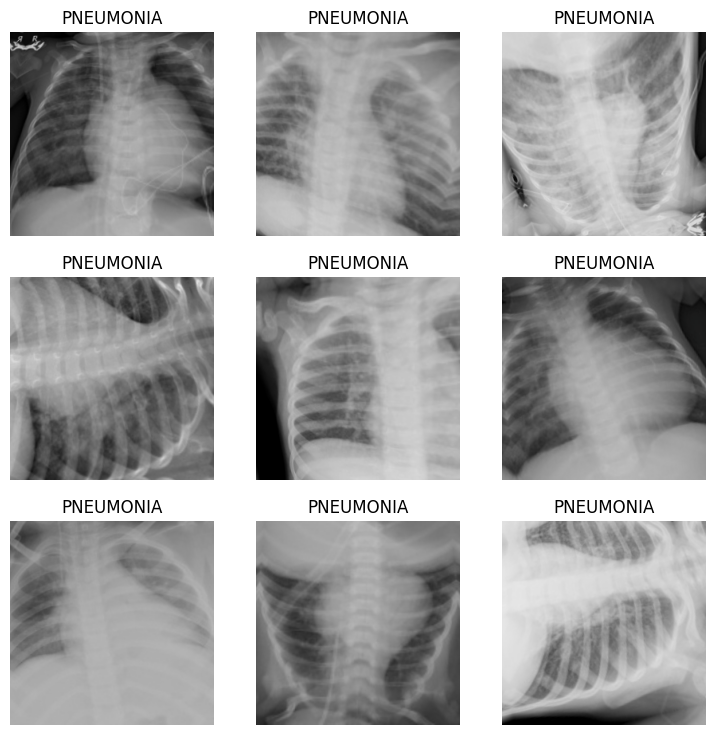

In [4]:
dls = db.dataloaders(trainPath,bs=128) # Mantenemos el batch de 128, como en el ejemplo
dls.show_batch()
callbacks = [
    ShowGraphCallback(),
    EarlyStoppingCallback(patience=5),
    SaveModelCallback(fname='modelResnet34ChestXRay')
]

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 169MB/s]


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.778091,0.698740,0.780612,0.997691,0.716418,00:14


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Better model found at epoch 0 with valid_loss value: 0.6987396478652954.


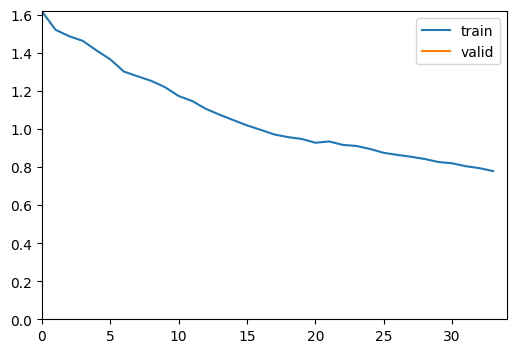

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.414232,0.368705,0.890306,1.000000,0.857380,00:14
1,0.303823,0.328049,0.931122,0.998185,0.912106,00:14
2,0.231593,0.197733,0.965561,0.998270,0.956882,00:14
3,0.179263,0.157991,0.970663,0.998282,0.963516,00:14
4,0.154847,0.160260,0.974490,0.998291,0.968491,00:14
5,0.124707,0.145187,0.975765,0.996599,0.971808,00:14
6,0.116034,0.125685,0.975765,0.998294,0.970149,00:14
7,0.105170,0.104926,0.982143,0.998308,0.978441,00:14
8,0.097935,0.102857,0.980867,0.998305,0.976783,00:14
9,0.093699,0.106379,0.980867,0.998305,0.976783,00:14


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Better model found at epoch 0 with valid_loss value: 0.3687048852443695.


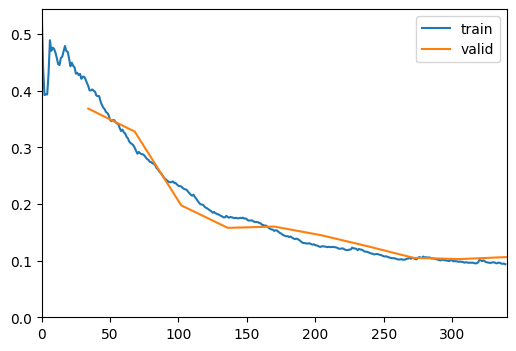

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Better model found at epoch 1 with valid_loss value: 0.3280492424964905.


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Better model found at epoch 2 with valid_loss value: 0.19773294031620026.


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Better model found at epoch 3 with valid_loss value: 0.15799139440059662.


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Better model found at epoch 5 with valid_loss value: 0.14518672227859497.


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Better model found at epoch 6 with valid_loss value: 0.12568511068820953.


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Better model found at epoch 7 with valid_loss value: 0.10492608696222305.


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Better model found at epoch 8 with valid_loss value: 0.10285720229148865.


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Better model found at epoch 0 with valid_loss value: 0.8525640964508057.
[0.8049268126487732, 0.8525640964508057, 0.9005376344086021, 0.8589743589743589]


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Tiempo de ejecución: 191.11671328544617 segundos


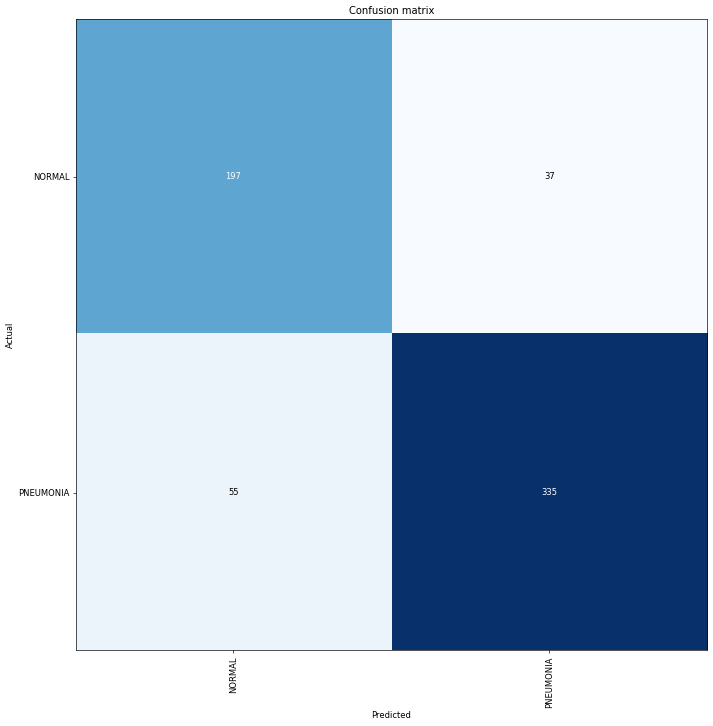

In [5]:

learn = vision_learner(dls,resnet34,metrics=[accuracy, Precision(), Recall()],cbs=callbacks).to_fp16()

learn.fine_tune(10,base_lr=1e-3) # esperar a la salida del anterior

Path('models').ls()

learn.to_fp32()
learn.export()

Path().ls(file_exts='.pkl')

dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(256),
                 batch_tfms=[*aug_transforms(size=128,min_scale=0.75),Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=128)
learn.dls = dlsTest
print(learn.validate())

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)
end_time = time.time()
execution_time = end_time - start_time
print("Tiempo de ejecución:", execution_time, "segundos")

In [7]:
print(learn.predict('chest_xray/test/PNEUMONIA/person10_virus_35.jpeg'))
print(learn.predict('chest_xray/test/NORMAL/IM-0001-0001.jpeg'))

('PNEUMONIA', tensor(1), tensor([0.0018, 0.9982]))


('NORMAL', tensor(0), tensor([1.0000e+00, 2.1409e-07]))


In [8]:
learn.validate()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Better model found at epoch 0 with valid_loss value: 0.8525640964508057.


(#4) [0.8049268126487732,0.8525640964508057,0.9005376344086021,0.8589743589743589]